In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from src.data_loading import DlDataset
from src.convnet import train_net

In [3]:
# Not very elegant but removes all the warnings about deprecated upsample funtion
import warnings
warnings.filterwarnings("ignore")

In [4]:
#import data for a 1000 pairs
N = 1000
dataset = DlDataset(N, normalize=True, upsample=(28,28))

In [5]:
#model, simple cnn with 2 conv layers and one hidden and output layer
class Net(nn.Module):
    def __init__(self,hiddenUnits):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(2, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(64*4*4, hiddenUnits)
        self.fc2 = nn.Linear(hiddenUnits, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.fc1(x.view(-1, 64*4*4)))
        x = F.log_softmax(self.fc2(x),dim=1)
        return x

In [6]:
# Train parameter
epochs = 5
eta = 5e-3
lambda_l2 = 1e-3
gamma = 0.2
depth = 4
n_filters = 3

# U-Net definition
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu') #Hannes' gpu is not supported but has cuda cores... 
model = Net(128).to(device)
optim = torch.optim.SGD(model.parameters(), lr=eta, momentum=gamma)
criterion = torch.nn.CrossEntropyLoss()
dataloader = DataLoader(dataset, batch_size=5,
                        shuffle=True, num_workers=4)

avg_epoch_loss, model = train_net(model, device, optim, criterion, dataloader, 
                                   epochs=epochs, lambda_=1e-3, reg_type=None, 
                                   save=False)

Epoch 0
Batch 10, Cross entropy loss: 87.21
Batch 20, Cross entropy loss: 44.97
Batch 30, Cross entropy loss: 30.54
Batch 40, Cross entropy loss: 23.17
Batch 50, Cross entropy loss: 18.76
Batch 60, Cross entropy loss: 15.84
Batch 70, Cross entropy loss: 13.69
Batch 80, Cross entropy loss: 12.06
Batch 90, Cross entropy loss: 10.81
Batch 100, Cross entropy loss: 9.81
Batch 110, Cross entropy loss: 8.98
Batch 120, Cross entropy loss: 8.29
Batch 130, Cross entropy loss: 7.72
Batch 140, Cross entropy loss: 7.23
Batch 150, Cross entropy loss: 6.80
Batch 160, Cross entropy loss: 6.42
Batch 170, Cross entropy loss: 6.09
Batch 180, Cross entropy loss: 5.79
Batch 190, Cross entropy loss: 5.53
Epoch 1
Batch 10, Cross entropy loss: 0.75
Batch 20, Cross entropy loss: 0.74
Batch 30, Cross entropy loss: 0.73
Batch 40, Cross entropy loss: 0.71
Batch 50, Cross entropy loss: 0.71
Batch 60, Cross entropy loss: 0.68
Batch 70, Cross entropy loss: 0.67
Batch 80, Cross entropy loss: 0.67
Batch 90, Cross entr

Predicted Target: 0, Real Target: 0
Real classes are, left: 4 right: 1
Predicted Target: 1, Real Target: 1
Real classes are, left: 0 right: 7


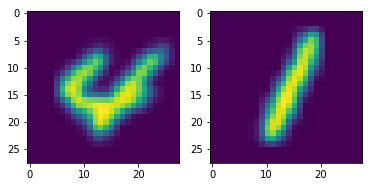

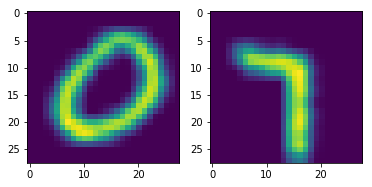

In [11]:
dataset.infere(model,1);
dataset.infere(model,0);